In [133]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score

In [134]:
vinos = pd.read_csv('winequality-red.csv')
vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,76.00,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98.00,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92.00,15.0,54.0,997.00000,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75.00,17.0,60.0,998.00000,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76.00,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.55,0.10,2.2,62.00,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,76.00,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,645.00,0.12,2.0,75.00,32.0,44.0,0.99547,3.57,0.71,10.2,5


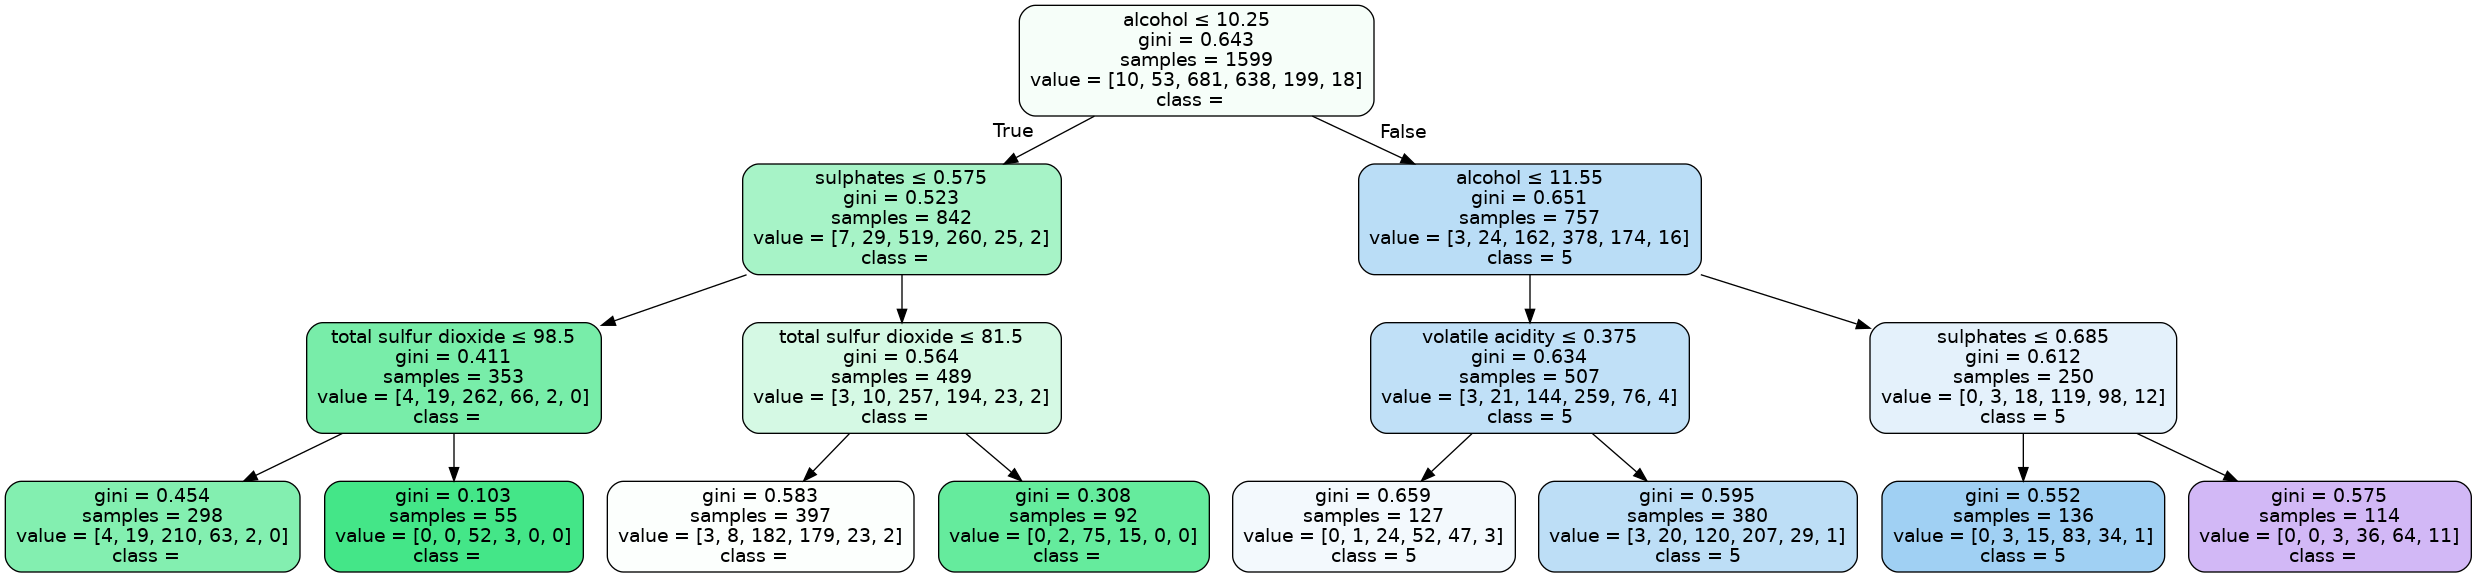

In [135]:
tree = DecisionTreeClassifier(max_depth=3)
X = vinos[['fixed acidity','volatile acidity','citric acid','residual sugar',
           'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = vinos.quality

tree.fit(X, y)
x_labels = ['fixed acidity','volatile acidity','citric acid','residual sugar',
            'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

dot_data = StringIO()
export_graphviz(tree, out_file = dot_data,
                feature_names = x_labels,
                class_names =str(y.values),
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Valores promedio para obtener vino de calidad 6**

In [136]:
calidad_6 = vinos[vinos['quality']==6]
calidad_6

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.00000,3.16,0.58,9.8,6
19,7.9,0.32,0.51,1.8,341.0,17.0,56.0,0.99690,3.04,1.08,9.2,6
20,8.9,0.22,0.48,1.8,77.0,29.0,60.0,0.99680,3.39,0.53,9.4,6
24,6.9,0.40,0.14,2.4,85.0,21.0,40.0,0.99680,3.43,0.63,9.7,6
29,7.8,645.00,0.00,2.0,82.0,8.0,16.0,0.99640,3.38,0.59,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.51,0.13,2.3,76.0,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.62,0.08,1.9,68.0,28.0,38.0,0.99651,3.42,0.82,9.5,6
1595,5.9,0.55,0.10,2.2,62.0,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,76.0,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [137]:
columnas = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
          'total sulfur dioxide','density','pH','sulphates','alcohol']
valores_promedio = []
valores_promedio.append(calidad_6['fixed acidity'].mean())
valores_promedio.append(calidad_6['volatile acidity'].mean())
valores_promedio.append(calidad_6['citric acid'].mean())
valores_promedio.append(calidad_6['residual sugar'].mean())
valores_promedio.append(calidad_6['chlorides'].mean())
valores_promedio.append(calidad_6['free sulfur dioxide'].mean())
valores_promedio.append(calidad_6['total sulfur dioxide'].mean())
valores_promedio.append(calidad_6['density'].mean())
valores_promedio.append(calidad_6['pH'].mean())
valores_promedio.append(calidad_6['sulphates'].mean())
valores_promedio.append(calidad_6['alcohol'].mean())

for i in range(11): 
    print(columnas[i],str(valores_promedio[i]))


fixed acidity 8.34717868338558
volatile acidity 60.38268025078369
citric acid 0.2738244514106583
residual sugar 2.477194357366771
chlorides 76.15614420062697
free sulfur dioxide 15.711598746081505
total sulfur dioxide 40.86990595611285
density 55.65350221003135
pH 3.31807210031348
sulphates 0.6753291536050157
alcohol 10.629519331243468


In [138]:
#verificar que predice calidad 6
y_pred = tree.predict(pd.DataFrame([valores_promedio], columns=columnas))
print("Prediccion de calidad", y_pred)

Prediccion de calidad [6]


**Kernel lineal**

In [139]:
# Crear una instancia de SVM y ajustar los datos.  
clf  = svm.SVC()
clf.fit(X, y)

SVC()

In [140]:
#comparar la prediccion anterior
clf_y_pred = clf.predict(pd.DataFrame([valores_promedio], columns=columnas))
print("Prediccion de calidad", clf_y_pred)

Prediccion de calidad [6]


**Cuantificación de la calidad de las predicciones**

In [141]:
tree_y_pred = tree.predict(X)
clf_y_pred = clf.predict(X)

**f1 score**

In [142]:
print(" métricas para cada etiqueta y encuentre su media no ponderada")
print("f1_score arbol clasificacion:",f1_score(y, tree_y_pred, average='macro'))
print("f1_score kernel lineal:",f1_score(y, clf_y_pred, average='macro'))

 métricas para cada etiqueta y encuentre su media no ponderada
f1_score arbol clasificacion: 0.270742184257497
f1_score kernel lineal: 0.18512467126711804


In [143]:
print(" métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.")
print("f1_score arbol clasificacion:",f1_score(y, tree_y_pred, average='micro'))
print("f1_score kernel lineal:",f1_score(y, clf_y_pred, average='micro'))

 métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.
f1_score arbol clasificacion: 0.5784865540963102
f1_score kernel lineal: 0.5090681676047529


In [144]:
print("métricas para cada etiqueta y encuentra su promedio ponderado por soporte (el número de instancias reales para cada etiqueta)")
print("f1_score arbol clasificacion:",f1_score(y, tree_y_pred, average='weighted'))
print("f1_score kernel linela:",f1_score(y, clf_y_pred, average='weighted'))

métricas para cada etiqueta y encuentra su promedio ponderado por soporte (el número de instancias reales para cada etiqueta)
f1_score arbol clasificacion: 0.5542092285404883
f1_score kernel linela: 0.4577001092207954


In [145]:
print("se devuelven las puntuaciones de cada clase")
print("f1_score arbol clasificacion:",f1_score(y, tree_y_pred, average=None))
print("f1_score kernel lineal:",f1_score(y, clf_y_pred, average=None))

se devuelven las puntuaciones de cada clase
f1_score arbol clasificacion: [0.         0.         0.68154957 0.53395785 0.40894569 0.        ]
f1_score kernel lineal: [0.         0.         0.53965658 0.57109145 0.         0.        ]


**accuracy**

In [146]:
print("precisión del subconjunto: el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto de etiquetas correspondiente")
print("accuracy_score arbol de decision: ",accuracy_score(y, tree_y_pred))
print("accuracy_score kernel lineal: ",accuracy_score(y, clf_y_pred))

precisión del subconjunto: el conjunto de etiquetas predichas para una muestra debe coincidir exactamente con el conjunto de etiquetas correspondiente
accuracy_score arbol de decision:  0.5784865540963102
accuracy_score kernel lineal:  0.5090681676047529


**precision**

In [147]:
print("métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos")
print("presicion_score arbol clasificacion: ",precision_score(y, tree_y_pred,average='micro'))
print("precision_score kernel lineal: ",precision_score(y, clf_y_pred,average='micro'))

métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos
presicion_score arbol clasificacion:  0.5784865540963102
precision_score kernel lineal:  0.5090681676047529
